# Spatial skill
Demonstrate nice plotting functionality etc by the SpatialSkill class

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

from fmskill import ModelResult, ModelResultCollection
from fmskill import PointObservation, TrackObservation

In [3]:
fn = '../tests/testdata/NorthSeaHD_and_windspeed.dfsu'
mr = ModelResult(fn, name='HD')
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)
o1 = TrackObservation(df, item=2, name='alti')
mr.add_observation(o1, item=0)
cc = mr.extract()

c:\users\jem\source\fmskill\fmskill\model.py:152: UserWarning: alti: Cannot validate as type is Undefined.
  warnings.warn(f"{observation.name}: Cannot validate as type is Undefined.")


In [4]:
ss = cc.spatial_skill()

In [5]:
ss

<xarray.Dataset>
Dimensions:      (x: 5, y: 5)
Coordinates:
  * y            (y) float64 50.6 51.66 52.7 53.75 54.8
  * x            (x) float64 -0.436 1.543 3.517 5.492 7.466
    observation  <U4 'alti'
Data variables:
    n            (y, x) int32 3 17 0 0 0 0 50 9 0 ... 72 33 15 28 37 83 0 20 76
    bias         (y, x) float64 -0.02626 -0.188 nan nan ... nan -0.2475 -0.1143
    rmse         (y, x) float64 0.03291 0.2105 nan nan ... nan 0.2635 0.1466
    urmse        (y, x) float64 0.01984 0.09468 nan nan ... nan 0.09066 0.09181
    mae          (y, x) float64 0.02626 0.1923 nan nan ... nan 0.2475 0.1203
    cc           (y, x) float64 0.9973 0.996 nan nan ... 0.9869 nan 0.6293 0.984
    si           (y, x) float64 0.04662 0.08053 nan nan ... nan 0.08427 0.117
    r2           (y, x) float64 0.994 0.9679 nan nan ... 0.9845 nan 0.94 0.9651

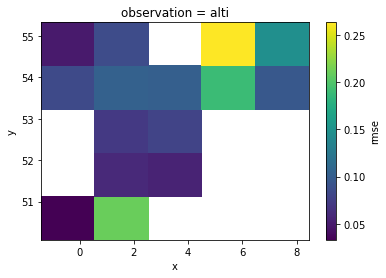

In [6]:
ss.plot('rmse');

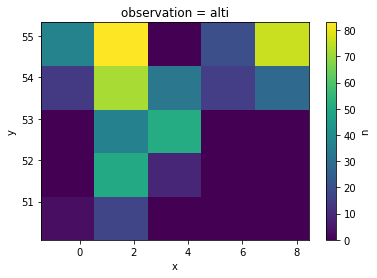

In [7]:
ss.plot('n')

## Multi models

In [8]:
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu"
mr1 = ModelResult(fn, name="SW_1")
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu"
mr2 = ModelResult(fn, name="SW_2")
mr = ModelResultCollection([mr1, mr2])

In [9]:
o1 = PointObservation("../tests/testdata/SW/HKNA_Hm0.dfs0", item=0, x=4.2420, y=52.6887, name="HKNA")
mr.add_observation(o1, item=0)
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
mr.add_observation(o2, item=0)
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
mr.add_observation(o3, item=0)
cc = mr.extract()

## Spatial_skill
Group by model

In [10]:
ss = cc.spatial_skill(by='model', bins=6)

In [11]:
ss.mod_names

array(['SW_1', 'SW_2'], dtype=object)

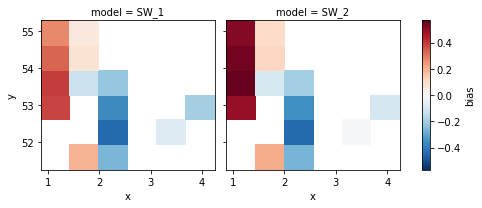

In [12]:
ss.plot("bias");

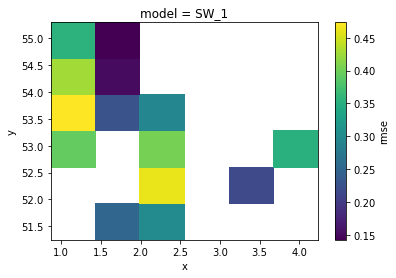

In [13]:
ss.plot("rmse", model='SW_1');